In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib


In [8]:
file = "./서울특별시_지하철 호선별 역별 승하차 인원 정보_202312.csv"


In [9]:
with open(file, "r", encoding="utf-8-sig") as f:
    title = f.readline()


In [10]:
subwayDF = pd.read_csv(
    file,
    encoding="utf-8",
    skiprows=1,
    header=None,
    usecols=[i for i in range(6)],
    names=title.replace("\n", "").replace('"', "").split(","),
)
subwayDF.drop(["등록일자", "하차총승객수"], axis="columns", inplace=True)
subwayDF


,사용일자,노선명,역명,승차총승객수
0,20231201,2호선,대림(구로구청),25995
1,20231201,2호선,신도림,55447
2,20231201,2호선,문래,25818
3,20231201,2호선,영등포구청,24517
4,20231201,2호선,당산,20266
...,...,...,...,...
18951,20231231,중앙선,중랑,3423
18952,20231231,중앙선,상봉(시외버스터미널),3665
18953,20231231,중앙선,망우,5053
18954,20231231,중앙선,양원,1420


In [11]:
subwayDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18956 entries, 0 to 18955
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    18956 non-null  int64 
 1   노선명     18956 non-null  object
 2   역명      18956 non-null  object
 3   승차총승객수  18956 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 592.5+ KB


In [12]:
subwayDF.set_index(["사용일자", "노선명", "역명"], inplace=True)
subwayDF


승차총승객수
사용일자     노선명 역명                 
20231201 2호선 대림(구로구청)      25995
             신도림           55447
             문래            25818
             영등포구청         24517
             당산            20266
...                          ...
20231231 중앙선 중랑             3423
             상봉(시외버스터미널)    3665
             망우             5053
             양원             1420
             구리             7601

[18956 rows x 1 columns]

1. 각 지하철 역별 평균 이용객 수


In [13]:
subwayDF_mean = pd.DataFrame(subwayDF.groupby(level=[1, 2]).mean())
subwayDF_mean.columns = ["평균이용객수"]
subwayDF_mean = subwayDF_mean.round(0).astype(int)
subwayDF_mean


평균이용객수
노선명 역명         
1호선 동대문   11763
    동묘앞    9386
    서울역   53372
    시청    25699
    신설동   13216
...         ...
중앙선 원덕      336
    중랑     5211
    지평       49
    팔당      822
    회기    25898

[621 rows x 1 columns]

2. 각 지하철 역별 이용객 수의 표준편차


In [14]:
subwayDF_std = pd.DataFrame(subwayDF.groupby(level=[1, 2]).std())
subwayDF_std.columns = ["이용객수표준편차"]
subwayDF_std = subwayDF_std.round(3)
subwayDF_std


이용객수표준편차
노선명 역명           
1호선 동대문   707.707
    동묘앞  2085.409
    서울역  8241.707
    시청   6561.060
    신설동  2783.721
...           ...
중앙선 원덕     58.719
    중랑    957.528
    지평      9.418
    팔당    111.720
    회기   4541.136

[621 rows x 1 columns]

In [15]:
subwayDF_station = pd.DataFrame(subwayDF_mean.groupby(level=[1]).sum())
subwayDF_station


,평균이용객수
역명,
4.19민주묘지,3151
가능,6106
가락시장,17047
가산디지털단지,50685
가양,20731
...,...
회기,25898
회룡,12379
회현(남대문시장),26721


3. 가장 많은 이용객이 있는 역의 이용객 수


In [16]:
print(f"{subwayDF_station.max().values[0]}명")


103316명


4. 가장 적은 이용객이 있는 역의 이용객 수


In [17]:
print(f"{subwayDF_station.min().values[0]}명")


1명


5. 이용객 수가 가장 많은 역의 이름


In [18]:
print(f"{subwayDF_station.idxmax().values[0]}")


잠실(송파구청)


6. 이용객 수가 가장 적은 역의 이름


In [19]:
print(f"{subwayDF_station.idxmin().values[0]}")


굴포천


7. 이용객 수의 분포를 히스토그램으로 시각화


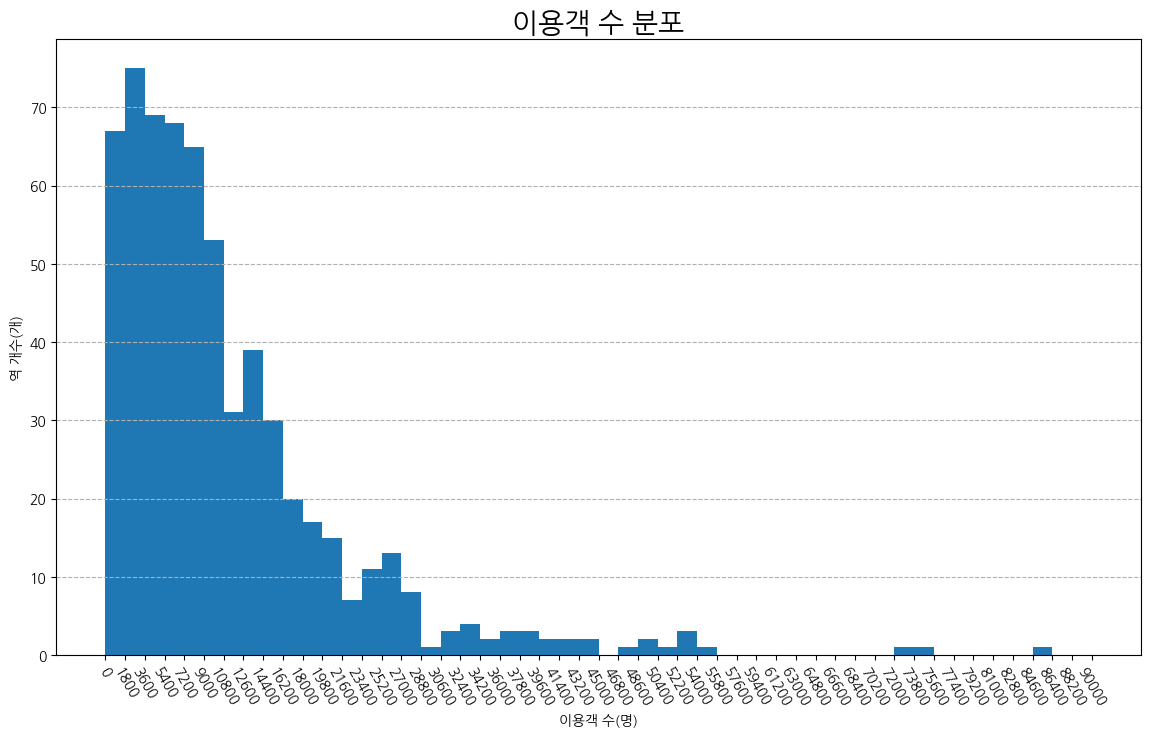

In [24]:
bin_num = 50
plt.figure(figsize=(14, 8))
ret = plt.hist(subwayDF_mean["평균이용객수"], bins=bin_num, range=(0, 90000))
plt.xticks(np.linspace(0, ret[1].max(), bin_num + 1), rotation=300)
plt.yticks(np.arange(0, ret[0].max() + 1, 10))
plt.xlabel("이용객 수(명)")
plt.ylabel("역 개수(개)")
plt.title("이용객 수 분포", fontsize=20)
plt.grid(axis="y", ls="--")
plt.show()
